In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

#### 分类散点图


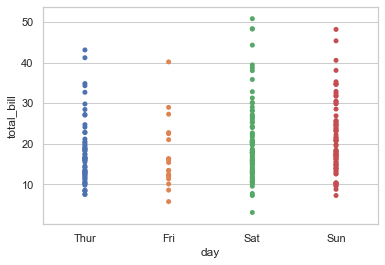

In [2]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=False)

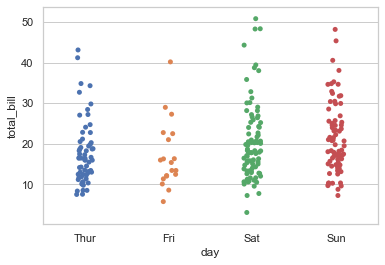

In [3]:
#  在条纹图中，散点图通常将重叠。这使得很难看到数据的完整分布。一个简单的解决方案是使用一些随机的“抖动”调整位置（仅沿着分类轴）
#  现在默认就会抖动了.
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

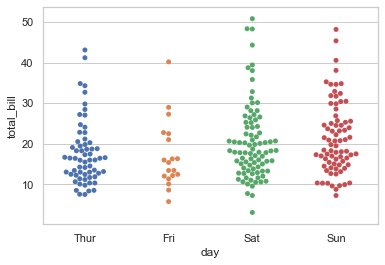

In [4]:
# 不同的方法是使用函数swarmplot()，它使用避免重叠点的算法将分类轴上的每个散点图点定位
# 抖动也会有重叠.所以swarmplot可能 更好一些
sns.swarmplot(x='day', y='total_bill', data=tips)

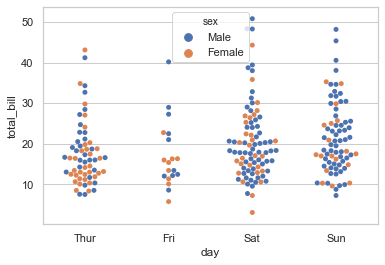

In [5]:
# 当然也可以传入hue参数添加多个嵌套的分类变量。高于分类轴上的颜色和位置时冗余的，现在每个都提供有两个变量之一的信息
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


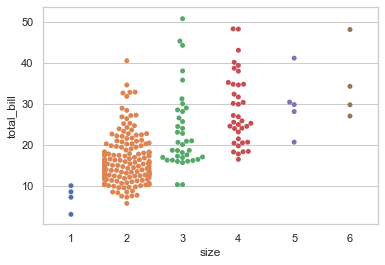

In [7]:
sns.swarmplot(x='size', y='total_bill', data=tips)
# swarmplot会按照DataFrame中的顺序绘制.

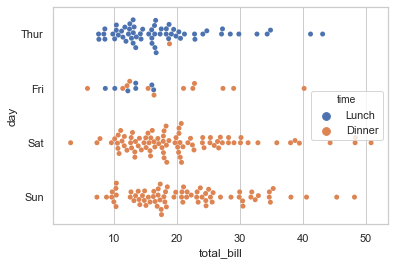

In [8]:
# 水平方向的swarmplot, 只需要调整x,y就可以了.
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips)


### 分类内的观测分布

分类散点图固然简单实用，但在某些特定的的情况下，他们可以提供的值的分布信息会变得及其有限（并不明晰）。 有几种方式可以方便的解决这个问题，在类别之间进行简单比较并汇总信息，我们快速讨论并比较一些适合这类数据观测的函数。

#### 箱型图

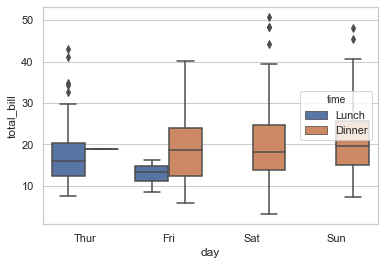

In [9]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)
# 最大值、最小值、中位数和两个四分位数 异常值

### 提琴图

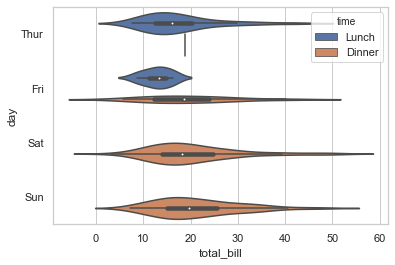

In [10]:
# 不同的方法是一个violinplot()，它结合了箱体图和分布教程中描述的核心密度估计过程
sns.violinplot(x='total_bill', y='day', hue='time', data=tips)

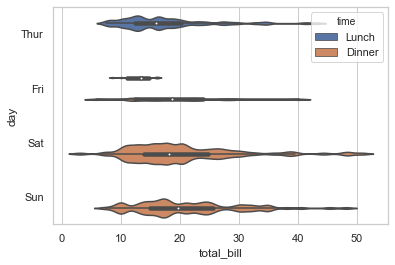

In [11]:
# 调节提琴图中的其他参数
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False)

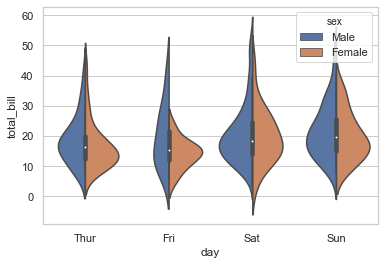

In [12]:
# 当色调参数只有两个级别时，也可以传入参数split至violinplot()，这样可以更有效地利用空间
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
# split=True, 把两种数据的分布合并到一个图上.

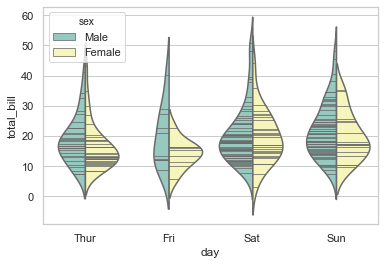

In [16]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3")
# inner表示小提琴内部的图,默认是box, stick,棍子的意思.

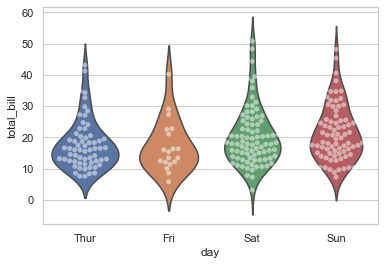

In [17]:
# 将swarmplot()或者swarmplot()与violinplot()或boxplot()结合使用可以显示每个观察结果以及分布的摘要
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

### 条形图

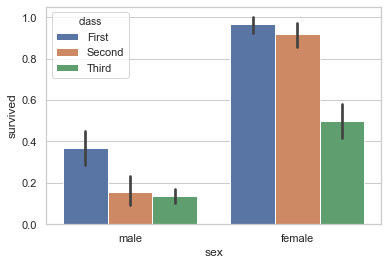

In [23]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)
# 条形图头上的棍子叫做误差棒, 在这里画的是置信区间, 可以改成标准偏差.

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


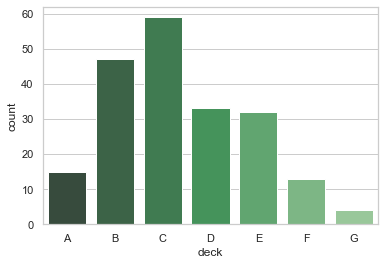

In [26]:
# 显示一组数据中各个类别的数量,有点像直方图
# 函数将默认使用count参数作为x/y中未传的一组维度
sns.countplot(x="deck", data=titanic, palette="Greens_d")

In [25]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


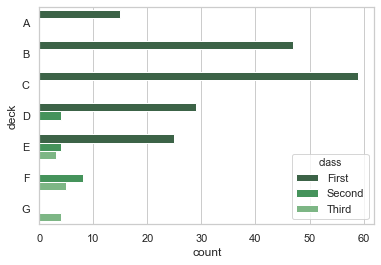

In [27]:
# 不传x, 就变成水平柱状图.同时可以引入第三个变量.
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d")

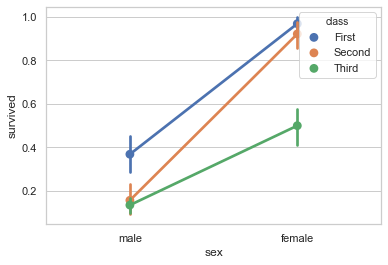

In [28]:
# 点图, 能很好的反映主要关系如何随着hue变量变化而变化的过程.
# pointplot()函数提供了可视化相同信息的另一种风格。该函数还对另一轴的高度估计值进行编码，而不是显示一个完整的柱型，它只绘制点估计和置信区间。
# 另外，点图连接相同hue类别的点。这使得很容易看出主要关系如何随着第二个变量的变化而变化，因为你的眼睛很好地收集斜率的差异
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)

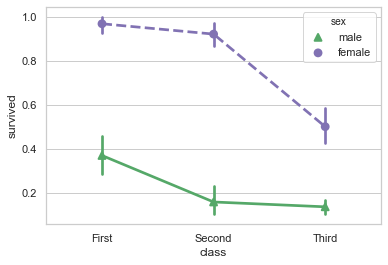

In [29]:
# 为了使能够在黑白中重现的图形，可以使用不同的标记和线条样式来展示不同hue类别的层次
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

In [31]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


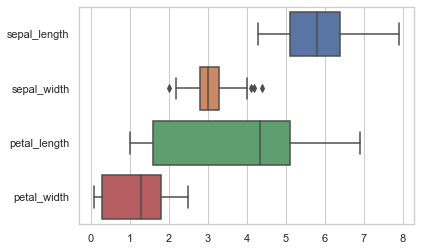

In [30]:
# 直接使用DataFrame的数据来绘制, 每一列数据就是一个箱型图
sns.boxplot(data=iris,orient="h")

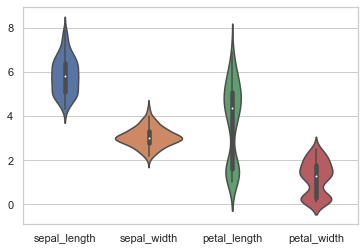

In [33]:
sns.violinplot(data=iris)

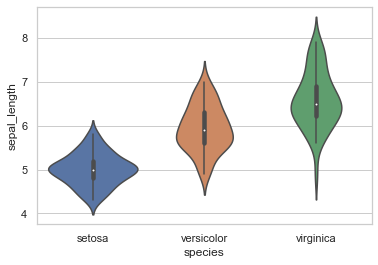

In [32]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

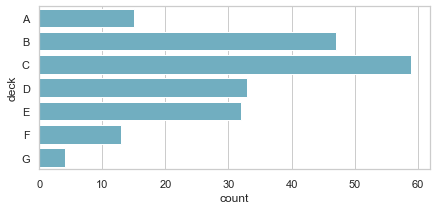

In [34]:
# matplotlib中的设置对sns图形依然起作用.
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

### 绘制多层面板分类图

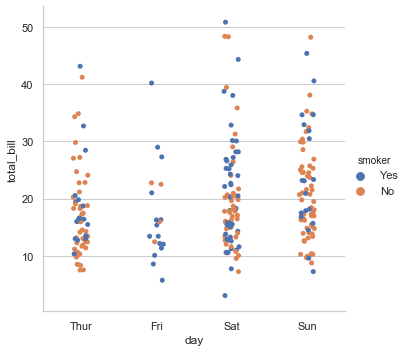

In [36]:
# cat category plot 
sns.catplot(x="day", y="total_bill", hue="smoker", data=tips)

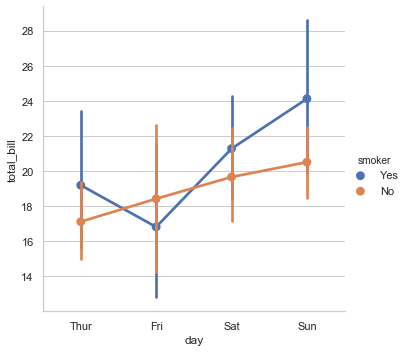

In [40]:
sns.catplot(x="day", y="total_bill", hue="smoker", data=tips, kind='point')

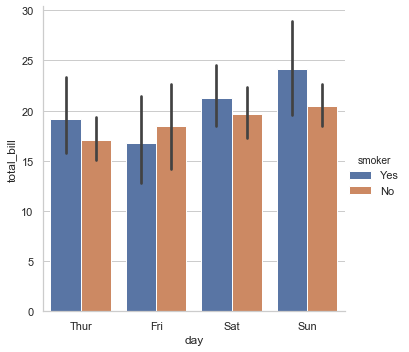

In [39]:
sns.catplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

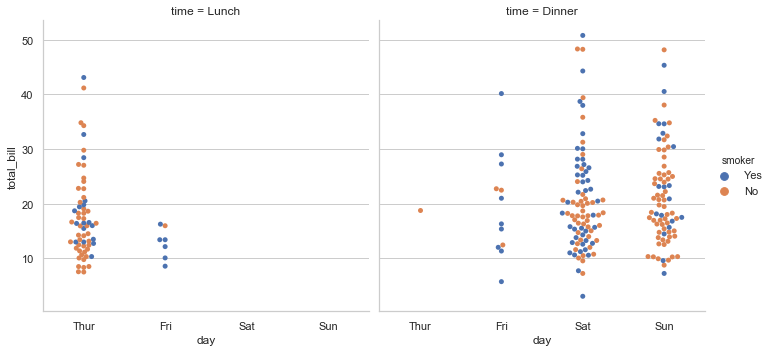

In [41]:
# 使用catplot()的主要优点是很容易调用"facet"展开更多其他分类变量
sns.catplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

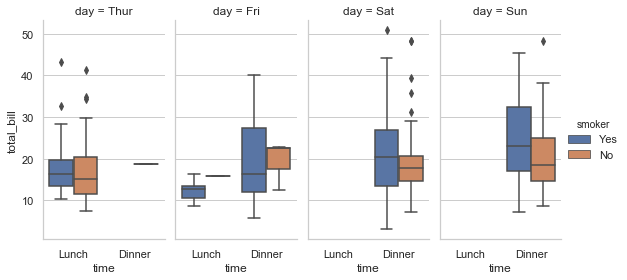

In [44]:
sns.catplot(x="time",  _bill", hue="smoker",
               col="day", data=tips, kind="box", height=4, aspect=.5)

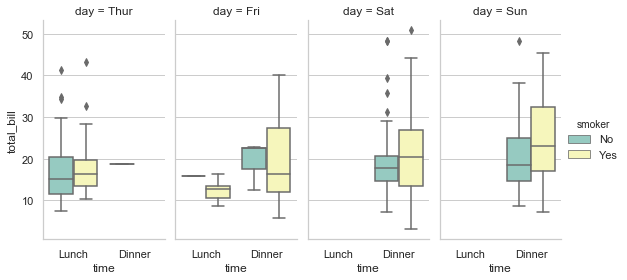

In [46]:
sns.catplot(x="time", y="total_bill", hue="smoker",hue_order=["No","Yes"]
               ,col="day", data=tips, kind="box", height=4, aspect=.5,
              palette="Set3")

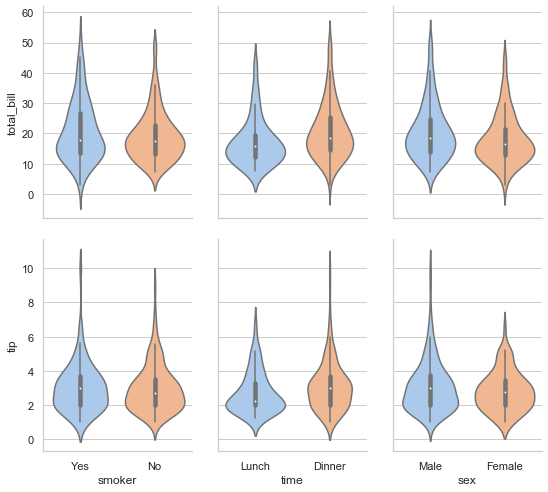

In [48]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, height=3.5)
g.map(sns.violinplot, palette="pastel")

In [ ]:
catplot参数详解
x,y,hue 数据集变量 变量名
date 数据集 数据集名
row,col 更多分类变量进行平铺显示 变量名
col_wrap 每行的最高平铺数 整数
estimator 在每个分类中进行矢量到标量的映射 矢量
ci 置信区间 浮点数或None
n_boot 计算置信区间时使用的引导迭代次数 整数
units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
order, hue_order 对应排序列表 字符串列表
row_order, col_order 对应排序列表 字符串列表
kind : 可选：point 默认, bar 柱形图, count 频次, box 箱体, violin 提琴, strip 散点，swarm 分散点（具体图形参考文章前部的分类介绍）
size 每个面的高度（英寸） 标量
aspect 纵横比 标量
orient 方向 "v"/"h"
color 颜色 matplotlib颜色
palette 调色板 seaborn颜色色板或字典
legend hue的信息面板 True/False
legend_out 是否扩展图形，并将信息框绘制在中心右边 True/False
share{x,y} 共享轴线 True/False
facet_kws FacetGrid的其他参数 字典